In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 200

In [34]:
# style.use('seaborn-darkgrid')
matplotlib.style.use('ggplot')
#matplotlib.rcParams['font.family'] = 'sans-serif'
# matplotlib.rcParams['font.sans-serif'] = 'Computer Modern'
sns.set_context('paper')
# cmap='PRGn', palette='PRGn'

In [3]:
epl_season = '2018-19'
data_to_import = './data/' + epl_season + '/players/Eden_Hazard_122/gw.csv'
# data_to_import = './data/' + epl_season + '/players/Paul_Pogba_302/gw.csv'
df = pd.read_csv(data_to_import, encoding='cp1252')
df.drop(labels=['kickoff_time','kickoff_time_formatted'], axis=1, inplace=True)
cols = df.columns.tolist()
cols.insert(0, cols.pop(cols.index('round')))
df = df.reindex(columns=cols)
df.rename(columns={'round': 'gameweek'}, inplace=True)
# df.set_index('gameweek', inplace=True)
# df.index = range(1,len(df)+1)
df

#sns.distplot(df['total_points'][df['total_points']>0], kde=False, color='purple')
#plt.show()

,gameweek,assists,attempted_passes,big_chances_created,big_chances_missed,bonus,bps,clean_sheets,clearances_blocks_interceptions,completed_passes,creativity,dribbles,ea_index,element,errors_leading_to_goal,errors_leading_to_goal_attempt,fixture,fouls,goals_conceded,goals_scored,ict_index,id,influence,key_passes,loaned_in,loaned_out,minutes,offside,open_play_crosses,opponent_team,own_goals,penalties_conceded,penalties_missed,penalties_saved,recoveries,red_cards,saves,selected,tackled,tackles,target_missed,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,winning_goals,yellow_cards
0,1,1,23,1,0,0,21,0,0,20,13.8,6,0,122,0,0,4,1,0,0,4.8,122,23.8,1,0,0,14,0,0,10,0,0,0,0,1,0,0,480326,0,0,0,3,0,10.0,4,0,0,0,105,False,0,0
1,2,1,28,0,0,0,15,0,0,25,35.3,2,0,122,0,0,14,0,0,0,9.1,647,26.4,3,0,0,29,0,0,1,0,0,0,0,3,0,0,602757,3,0,0,2,3,29.0,4,26490,62988,36498,105,True,0,0
2,3,0,101,0,0,1,23,0,0,91,37.3,2,0,122,0,0,27,0,1,1,13.7,1174,41.0,1,0,0,90,1,0,15,0,0,0,0,2,0,0,680315,7,0,2,2,1,59.0,8,45129,114256,69127,105,False,0,0
3,4,0,62,0,0,3,36,1,1,57,67.0,5,0,122,0,0,34,0,0,1,16.7,1705,52.8,5,0,0,90,0,0,2,0,0,0,0,2,0,0,848251,4,0,0,0,2,47.0,11,125498,153734,28236,106,True,0,0
4,5,0,74,0,0,3,71,0,0,66,30.7,4,0,122,0,0,42,0,1,3,21.1,2242,111.6,1,0,0,83,0,1,5,0,0,0,0,6,0,0,1277626,4,0,0,1,4,69.0,20,364850,388934,24084,107,True,1,0
5,6,0,54,0,1,0,-1,1,0,45,19.3,2,0,122,0,0,60,0,0,0,7.9,2779,12.2,1,0,0,90,1,0,19,0,0,0,0,2,0,0,1926510,10,0,0,0,0,47.0,3,609551,619636,10085,109,False,0,0
6,7,0,48,1,1,3,32,0,4,36,43.9,1,0,122,0,0,64,1,1,1,13.3,3317,51.4,3,0,0,90,0,1,12,0,0,0,0,7,0,0,2082831,4,1,0,1,1,38.0,10,158440,192768,34328,110,True,0,0
7,8,1,74,3,0,3,48,1,0,63,66.3,1,0,122,0,0,78,0,0,1,22.6,3856,62.4,4,0,0,90,0,0,16,0,0,0,0,1,0,0,2555227,6,0,0,3,0,97.0,14,426104,430652,4548,112,False,1,0
8,9,0,61,0,0,0,8,0,0,53,72.6,2,0,122,0,0,84,1,2,0,14.5,4398,17.6,6,0,0,90,0,0,14,0,0,0,0,3,0,0,2938961,6,0,1,2,2,55.0,1,361535,380537,19002,114,True,0,1
9,10,0,0,0,0,0,0,0,0,0,0.0,0,0,122,0,0,92,0,0,0,0.0,4944,0.0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,2705530,0,0,0,4,0,0.0,0,-213548,69358,282906,114,False,0,0


In [4]:
teams = pd.read_csv('./data/' + epl_season + '/teams.csv')
teams.head()

,id,name,short_name,strength
0,1,Arsenal,ARS,4
1,2,Bournemouth,BOU,3
2,3,Brighton,BHA,2
3,4,Burnley,BUR,3
4,5,Cardiff,CAR,2


In [5]:
fixtures = pd.read_csv('./data/' + epl_season + '/fixtures.csv')

def parse_home_score(row):
    string = str(row)
    home = string.split()[0]
    return int(home)

def parse_away_score(row):
    string = str(row)
    away = string.split()[-1]
    return int(away)

fixtures['Home Score'] = fixtures['Result'].apply(parse_home_score)
fixtures['Away Score'] = fixtures['Result'].apply(parse_away_score)

# fixtures.head()
fixtures[fixtures['Round Number'] == 26]

,Round Number,Date,Location,Home Team,Away Team,Result,Home Score,Away Score
250,26,06/02/2019 19:45,Goodison Park,Everton,Man City,0 - 2,0,2
251,26,09/02/2019 12:30,Craven Cottage,Fulham,Man Utd,0 - 3,0,3
252,26,09/02/2019 15:00,Selhurst Park,Crystal Palace,West Ham,1 - 1,1,1
253,26,09/02/2019 15:00,John Smith's Stadium,Huddersfield,Arsenal,1 - 2,1,2
254,26,09/02/2019 15:00,Anfield,Liverpool,Bournemouth,3 - 0,3,0
255,26,09/02/2019 15:00,St. Mary's Stadium,Southampton,Cardiff,1 - 2,1,2
256,26,09/02/2019 15:00,Vicarage Road,Watford,Everton,1 - 0,1,0
257,26,09/02/2019 17:30,Amex Stadium,Brighton,Burnley,1 - 3,1,3
258,26,10/02/2019 13:30,Tottenham Hotspur Stadium,Spurs,Leicester,3 - 1,3,1
259,26,10/02/2019 16:00,Etihad Stadium,Man City,Chelsea,6 - 0,6,0


In [6]:
def get_points(gmwk):
    n_matches = check_match(gmwk)
    if n_matches == 0:
        return 0
    elif n_matches == 2:
        points = 0
        for index, row in df[df['gameweek'] == gmwk].iterrows():
            row = row.to_frame().T
            points += row['total_points'].item()
        return points
    else:
        return df[df['gameweek'] == gmwk]['total_points'].item()
def get_minutes(gmwk):
    n_matches = check_match(gmwk)
    if n_matches == 0:
        return 0
    elif n_matches == 2:
        points = 0
        for index, row in df[df['gameweek'] == gmwk].iterrows():
            row = row.to_frame().T
            points += row['minutes'].item()
        return points
    else:
        return df[df['gameweek'] == gmwk]['minutes'].item()
def get_home(gmwk):
#TODO: need to think about how to incorporate gameweeks with 2 matches
    n_matches = check_match(gmwk)
    if n_matches == 0 or n_matches == 2: return 0
    else: return df[df['gameweek'] == gmwk]['was_home'].item() * 1
def get_selected(gmwk):
    n_matches = check_match(gmwk)
    if n_matches == 0:
        return 0
    elif n_matches == 2:
        points = 0
        for index, row in df[df['gameweek'] == gmwk].iterrows():
            row = row.to_frame().T
            points += row['selected'].item()
        return points
    else:
        return df[df['gameweek'] == gmwk]['selected'].item()
def get_transfers_in(gmwk):
    n_matches = check_match(gmwk)
    if n_matches == 0:
        return 0
    elif n_matches == 2:
        points = 0
        for index, row in df[df['transfers_in'] == gmwk].iterrows():
            row = row.to_frame().T
            points += row['selected'].item()
        return points
    else:
        return df[df['gameweek'] == gmwk]['transfers_in'].item()
def get_transfers_out(gmwk):
    n_matches = check_match(gmwk)
    if n_matches == 0:
        return 0
    elif n_matches == 2:
        points = 0
        for index, row in df[df['transfers_out'] == gmwk].iterrows():
            row = row.to_frame().T
            points += row['selected'].item()
        return points
    else:
        return df[df['gameweek'] == gmwk]['transfers_out'].item()
def get_transfers_balance(gmwk):
    n_matches = check_match(gmwk)
    if n_matches == 0:
        return 0
    elif n_matches == 2:
        points = 0
        for index, row in df[df['transfers_balance'] == gmwk].iterrows():
            row = row.to_frame().T
            points += row['selected'].item()
        return points
    else:
        return df[df['gameweek'] == gmwk]['transfers_balance'].item()
def check_match(gmwk):
    #returns number of matches this gameweek
    try:
        n_matches = df.gameweek.value_counts()[gmwk]
    except:
        n_matches = 0
    return n_matches
def get_team_points(gmwk, team_id):
    n_matches = check_match(gmwk) #number of games for this gameweek
    total_points = 0
    if n_matches == 0: return total_points
    
    gmwk_fixtures = fixtures[fixtures['Round Number'] == gmwk] #fixtures for current gmwk
    team_name = teams['name'][teams['id'] == team_id].tolist()[0]
    rows = gmwk_fixtures[gmwk_fixtures.eq(team_name).any(axis=1)]

    for index, row in rows.iterrows(): #if multiple games in current gameweek, then add up points
        row = row.to_frame().T
        if team_name in row['Home Team'].item():
            gmwk_fixtures.set_index('Home Team', inplace=True)
            home = True
        else:
            gmwk_fixtures.set_index('Away Team', inplace=True)
            home = False
        
        if row['Home Score'].item() == row['Away Score'].item():
            total_points += 1
        if home:
            if row['Home Score'].item() > row['Away Score'].item():
                total_points += 3
            else:
                total_points += 0
        else:
            if row['Home Score'].item() > row['Away Score'].item():
                total_points += 0
            else:
                total_points += 3
    return total_points
def get_opp_team(gmwk):
    #get opponent team id
    #TODO: need to think about how to incorporate gameweeks with 2 matches
    n_matches = check_match(gmwk)
    if n_matches == 0:
        return 0
    elif n_matches == 2:
        return df[df['gameweek'] == gmwk]['opponent_team'].tolist()[0]
    else:
        return df[df['gameweek'] == gmwk]['opponent_team'].item()
def get_team_form(gmwk, team_id):
    #form is integer from 0-3
    form = get_team_points(gmwk, team_id)
    return form
def get_team_rank(gmwk, team_id):
    #team rank is integer from 2-5
    #TODO: have this function depend on gmwk (update EPL table)
    #TODO: need to think about how to incorporate gameweeks with 2 matches
    n_matches = check_match(gmwk) #number of games for this gameweek
    total_points = 0
    if n_matches == 0: return 0
    rank = teams[teams['id'] == team_id]['strength'].tolist()[0]#.item() #table rank 2-5
    return rank
def get_team_strength(gmwk, team_id):
    #team strength = team form + team rank
    strength = get_team_form(gmwk, team_id) + get_team_rank(gmwk, team_id)
    return strength
def get_team():
    #use first gameweek information to get current team id
    opp_gmwk1 = df['opponent_team'].tolist()[0] #opponent team id
    opp_team = teams[teams['id'] == opp_gmwk1]['name'].tolist()[0] #opponent team name
    gmwk_fixtures = fixtures[fixtures['Round Number'] == 1] #just use first gameweek information to get team
    home = df['was_home'].tolist()[0]
    if home:
        gmwk_fixtures.set_index('Away Team', inplace=True)
        team_name = gmwk_fixtures.loc[opp_team]['Home Team']
    else:
        gmwk_fixtures.set_index('Home Team', inplace=True)
        team_name = gmwk_fixtures.loc[opp_team]['Away Team']
    team_id = teams.id[teams['name'] == team_name].tolist()[0]
    return team_id

def get_player_strength(gmwk):
    #player strength = sum of individual player properties
    n_matches = check_match(gmwk)
    if n_matches == 0:
        return 0
    elif n_matches == 2:
        player_strength = 0
        for index, row in df[df['gameweek'] == gmwk].iterrows():
            row = row.to_frame().T
            player_strength += row['value'].item() + row['creativity'].item() + \
                row['ict_index'].item() + row['influence'].item() + row['threat'].item()
        return player_strength
    else:
        player_value = df[df['gameweek'] == gmwk]['value'].item()
        player_creativity = df[df['gameweek'] == gmwk]['creativity'].item()
        player_ict = df[df['gameweek'] == gmwk]['ict_index'].item()
        player_influence = df[df['gameweek'] == gmwk]['influence'].item()
        player_threat = df[df['gameweek'] == gmwk]['threat'].item()
        player_strength = player_value + player_creativity + player_ict + player_influence + player_threat
        return player_strength

In [7]:
gmwk_columns = ['gameweek', 'minutes-2', 'minutes-1', 'minutes', 'player_strength-2', 'player_strength-1', 'player_strength', 'team', 'team_strength-2', 'team_strength-1', 'team_strength', 'opp', 'opp_strength-2', 'opp_strength-1', 'opp_strength', 'selected-2', 'selected-1', 'selected', 'transfers_balance-2', 'transfers_balance-1', 'transfers_balance', 'transfers_in-2', 'transfers_in-1', 'transfers_in', 'transfers_out-2', 'transfers_out-1', 'transfers_out', 'home-2', 'home-1', 'home', 'points-2', 'points-1', 'points', 'points_next_week']
df2 = pd.DataFrame(columns=gmwk_columns)
df2.head()

,gameweek,minutes-2,minutes-1,minutes,player_strength-2,player_strength-1,player_strength,team,team_strength-2,team_strength-1,team_strength,opp,opp_strength-2,opp_strength-1,opp_strength,selected-2,selected-1,selected,transfers_balance-2,transfers_balance-1,transfers_balance,transfers_in-2,transfers_in-1,transfers_in,transfers_out-2,transfers_out-1,transfers_out,home-2,home-1,home,points-2,points-1,points,points_next_week


In [8]:
def update_dataframe(gmwk, df):
    #run this function to add a new row for a gameweek
    #for example if this upcoming saturday is gameweek 10, run this function
    #with gmwk=9 so we can update the dataframe and make predictions for gameweek 10

    if gmwk == 1 or gmwk == 2: #for gameweeks 1 and 2, I set past data to 0.
        #TODO: need to replace gameweek 1 and 2 info with average of last season data instead of 0?
        #what if they werent in EPL last season?
        df_update = pd.DataFrame([[
        gmwk,
        0,
        0,
        get_minutes(gmwk),
        0,
        0,
        get_player_strength(gmwk),
        get_team(),
        0,
        0,
        get_team_strength(gmwk, get_team()),
        get_opp_team(gmwk),
        0,
        0,
        get_team_strength(gmwk, get_opp_team(gmwk)),
        0,
        0,
        get_selected(gmwk),
        0,
        0,
        get_transfers_balance(gmwk),
        0,
        0,
        get_transfers_in(gmwk),
        0,
        0,
        get_transfers_out(gmwk),
        0,
        0,
        get_home(gmwk),
        0,
       0,
        get_points(gmwk),
        get_points(gmwk+1)
        ]], columns=gmwk_columns)
    
    else:
        df_update = pd.DataFrame([[
            gmwk,
            get_minutes(gmwk-2),
            get_minutes(gmwk-1),
            get_minutes(gmwk),
            get_player_strength(gmwk-2),
            get_player_strength(gmwk-1),
            get_player_strength(gmwk),
            get_team(),
            get_team_strength(gmwk-2, get_team()),
            get_team_strength(gmwk-1, get_team()),
            get_team_strength(gmwk, get_team()),
            get_opp_team(gmwk),
            get_team_strength(gmwk-2, get_opp_team(gmwk-2)),
            get_team_strength(gmwk-1, get_opp_team(gmwk-1)),
            get_team_strength(gmwk, get_opp_team(gmwk)),
            get_selected(gmwk-2),
            get_selected(gmwk-1),
            get_selected(gmwk),
            get_transfers_balance(gmwk-2),
            get_transfers_balance(gmwk-1),
            get_transfers_balance(gmwk),
            get_transfers_in(gmwk-2),
            get_transfers_in(gmwk-1),
            get_transfers_in(gmwk),
            get_transfers_out(gmwk-2),
            get_transfers_out(gmwk-1),
            get_transfers_out(gmwk),
            get_home(gmwk-2),
            get_home(gmwk-1),
            get_home(gmwk),
            get_points(gmwk-2),
            get_points(gmwk-1),
            get_points(gmwk),
            get_points(gmwk+1)
            ]], columns=gmwk_columns)
    
    df = df.append(df_update, ignore_index=True)
    return df

In [277]:
df3 = df2

In [278]:
for g in range(1,38):
    n_matches = check_match(g)
    if n_matches == 0: pass
    else: df3 = update_dataframe(g, df3)

df3
#TODO: consider: make two separate rows in df3 for a double gameweek? or normalize data per minute?
# problem with this is how to update table in an automated way? because we currently call all functions by gmwk number
#TODO: consider: if n_matches=0, dont set values to 0 but use previous gameweek values

c:\users\winte\appdata\local\programs\python\python36\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,gameweek,minutes-2,minutes-1,minutes,player_strength-2,player_strength-1,player_strength,team,team_strength-2,team_strength-1,team_strength,opp,opp_strength-2,opp_strength-1,opp_strength,selected-2,selected-1,selected,transfers_balance-2,transfers_balance-1,transfers_balance,transfers_in-2,transfers_in-1,transfers_in,transfers_out-2,transfers_out-1,transfers_out,home-2,home-1,home,points-2,points-1,points,points_next_week
0,1,0,0,14,0,0,157.4,6,0,0,7,10,0,0,2,0,0,480326,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4
1,2,0,0,29,0,0,204.8,6,0,0,7,1,0,0,4,0,0,602757,0,0,26490,0,0,62988,0,0,36498,0,0,1,0,0,4,8
2,3,14,29,90,157.4,204.8,256.0,6,7,7,7,15,2,4,3,480326,602757,680315,0,26490,45129,0,62988,114256,0,36498,69127,0,1,0,4,4,8,11
3,4,29,90,90,204.8,256,289.5,6,7,7,7,2,4,3,3,602757,680315,848251,26490,45129,125498,62988,114256,153734,36498,69127,28236,1,0,1,4,8,11,20
4,5,90,90,83,256,289.5,339.4,6,7,7,7,5,3,3,2,680315,848251,1277626,45129,125498,364850,114256,153734,388934,69127,28236,24084,0,1,1,8,11,20,3
5,6,90,83,90,289.5,339.4,195.4,6,7,7,8,19,3,2,4,848251,1277626,1926510,125498,364850,609551,153734,388934,619636,28236,24084,10085,1,1,0,11,20,3,10
6,7,83,90,90,339.4,195.4,256.6,6,7,8,5,12,2,4,9,1277626,1926510,2082831,364850,609551,158440,388934,619636,192768,24084,10085,34328,1,0,1,20,3,10,14
7,8,90,90,90,195.4,256.6,360.3,6,8,5,7,16,4,9,3,1926510,2082831,2555227,609551,158440,426104,619636,192768,430652,10085,34328,4548,0,1,0,3,10,14,1
8,9,90,90,90,256.6,360.3,273.7,6,5,7,5,14,9,3,8,2082831,2555227,2938961,158440,426104,361535,192768,430652,380537,34328,4548,19002,1,0,1,10,14,1,0
9,10,90,90,0,360.3,273.7,114.0,6,7,5,7,4,3,8,3,2555227,2938961,2705530,426104,361535,-213548,430652,380537,69358,4548,19002,282906,0,1,0,14,1,0,4


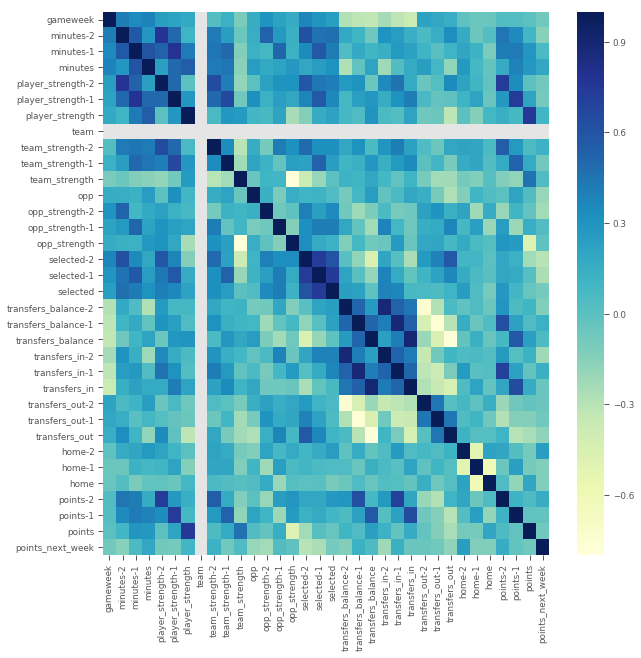

In [279]:
corr = df3.astype(float).corr()
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(corr, cmap="YlGnBu", ax=ax)

In [286]:
#Need to concatenate all player info into X and y so we can make a general regressor
#Need to run feature engineering to reduce variance, normalize
X = df3.drop(labels=['points_next_week', 'team'], axis=1)
X = X.drop(labels=['gameweek', 'minutes-2', 'minutes-1', 'player_strength-2', 'player_strength-1', 'team_strength-2', 'team_strength-1', 'opp', 'opp_strength-2', 'opp_strength-1', 'selected-2', 'selected-1', 'transfers_balance-2', 'transfers_balance-1', 'transfers_in-2', 'transfers_in-1', 'transfers_out-2', 'transfers_out-1', 'home-2', 'home-1', 'points-2', 'points-1'], axis=1)
X = X.astype(float)#[2:]
y = df3['points_next_week']#[2:]

In [299]:
#Should shuffle be on or off?
#Maybe there is something to learn about successive gameweeks and tiredness?

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics, model_selection
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24, shuffle=False)

In [300]:
pipe_linreg = Pipeline(
    [('stdscale', StandardScaler()),
     ('linreg', LinearRegression())]
    )

pipe_dtree = Pipeline(
    [('stdscale', StandardScaler()),
     ('dtree', DecisionTreeRegressor(criterion='mse', max_features=None))]
    )

In [301]:
pipe_linreg.fit(X_train, y_train)
pipe_dtree.fit(X_train, y_train)

tree = DecisionTreeRegressor(criterion='mse', max_features=None)
tree.fit(X_train, y_train)
dfff = pd.DataFrame(tree.feature_importances_, index=X.columns)
print(dfff)

                          0
minutes            0.126054
player_strength    0.027145
team_strength      0.000698
opp_strength       0.000931
selected           0.348354
transfers_balance  0.000000
transfers_in       0.002095
transfers_out      0.024159
home               0.020526
points             0.450037


In [302]:
print(pipe_linreg.score(X_test, y_test))
print(pipe_dtree.score(X_test, y_test))

-2.3019569385126446
-3.2771017699115053


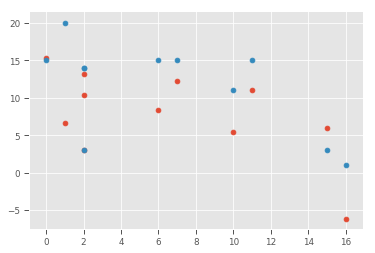

In [303]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(y_test, pipe_linreg.predict(X_test))
ax1.scatter(y_test, pipe_dtree.predict(X_test))

In [14]:
# from sklearn.metrics import r2_score
# print(r2_score(y_test, y_predict))
# print(np.sqrt(metrics.mean_squared_error(y_test, y_predict)))